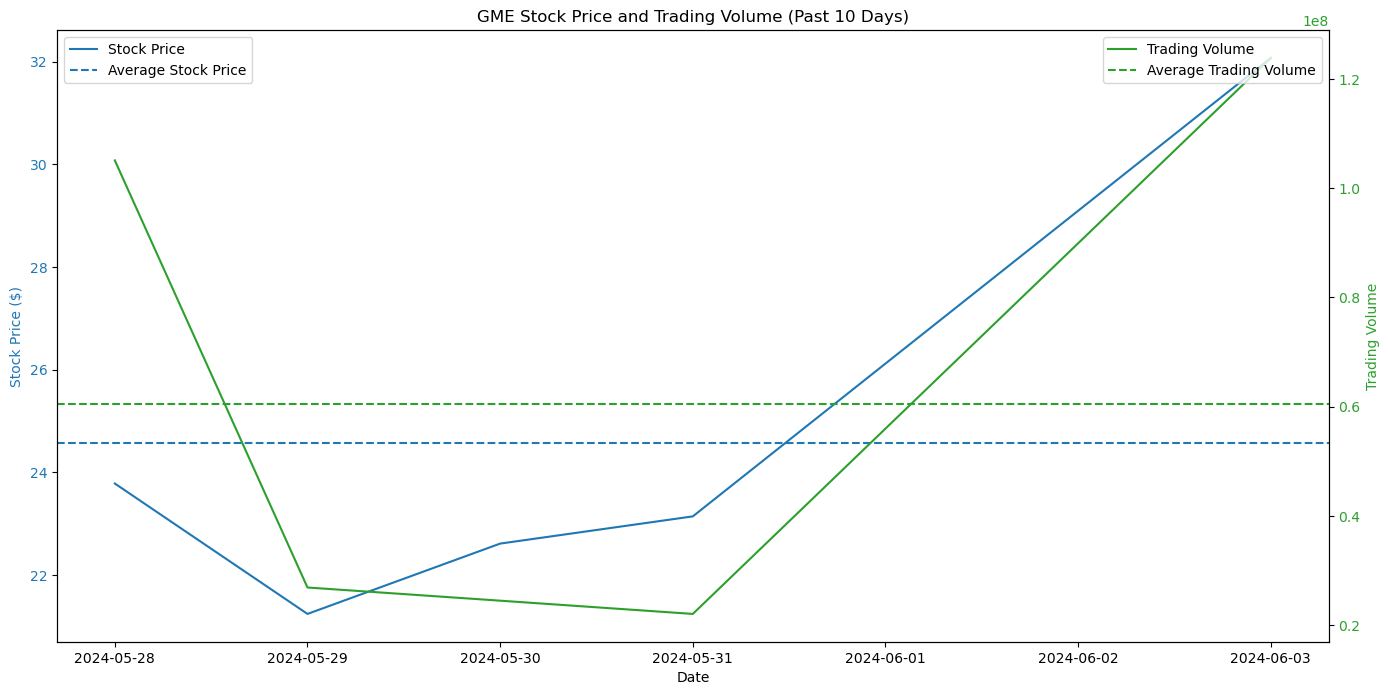

In [10]:
"""
This script fetches the historical stock data for GME (GameStop Corp.) for the past 5 days using the yfinance package.
It calculates the average closing price and average trading volume over this period.
The script then creates a dual-axis plot using matplotlib to display the stock prices and trading volumes, along with their respective averages.
The result is a comprehensive visualization that provides insights into the recent performance of GME stock.
"""

import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Fetch the GME stock data for the past 10 days
gme = yf.Ticker("GME")
gme_hist = gme.history(period="5d")

# Calculate the average stock price and average trading volume
average_price = gme_hist['Close'].mean()
average_volume = gme_hist['Volume'].mean()

# Plot the stock price and trading volume
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price ($)', color=color)
ax1.plot(gme_hist.index, gme_hist['Close'], color=color, label='Stock Price')
ax1.axhline(average_price, color=color, linestyle='--', label='Average Stock Price')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Trading Volume', color=color)
ax2.plot(gme_hist.index, gme_hist['Volume'], color=color, label='Trading Volume')
ax2.axhline(average_volume, color=color, linestyle='--', label='Average Trading Volume')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()  # to prevent overlap of labels
plt.title('GME Stock Price and Trading Volume (Past 10 Days)')
plt.show()





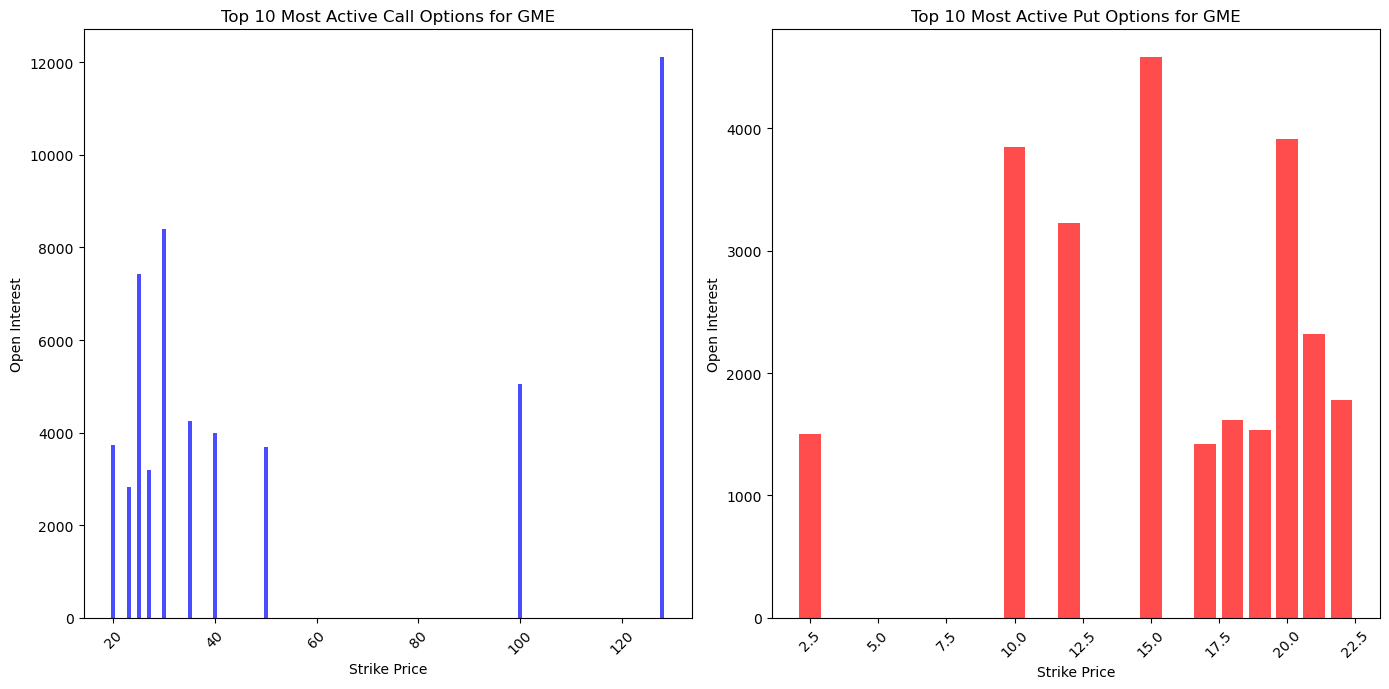

In [12]:
"""
This script fetches the historical stock data for GME (GameStop Corp.) for the past 5 days using the yfinance package.
It calculates the average closing price and average trading volume over this period.
The script then creates a dual-axis plot using matplotlib to display the stock prices and trading volumes, along with their respective averages.
The result is a comprehensive visualization that provides insights into the recent performance of GME stock.
"""

# Get the expiration dates for options
expirations = gme.options

# Fetch option data for the nearest expiration date
options_data = gme.option_chain(expirations[0])
calls = options_data.calls
puts = options_data.puts

# Identify the most active options by open interest
most_active_calls = calls.sort_values(by='openInterest', ascending=False).head(10)
most_active_puts = puts.sort_values(by='openInterest', ascending=False).head(10)

# Plotting the most active calls
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.bar(most_active_calls['strike'], most_active_calls['openInterest'], color='blue', alpha=0.7)
plt.xlabel('Strike Price')
plt.ylabel('Open Interest')
plt.title('Top 10 Most Active Call Options for GME')
plt.xticks(rotation=45)

# Plotting the most active puts
plt.subplot(1, 2, 2)
plt.bar(most_active_puts['strike'], most_active_puts['openInterest'], color='red', alpha=0.7)
plt.xlabel('Strike Price')
plt.ylabel('Open Interest')
plt.title('Top 10 Most Active Put Options for GME')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
